In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\ACER\\OneDrive\\Desktop\\PythonDesk\\CaseStudy\\Case Study 3 - Insurance Claims Case Study')
##pd.options.display.float_format = '{:.0f}'.format

import scipy.stats as stats

In [2]:
cust_data = pd.read_csv('cust_demographics.csv')
claims_data = pd.read_csv('claims.csv')

In [3]:
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
cust_data.shape

(1085, 6)

In [5]:
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
claims_data.shape

(1100, 10)

In [7]:
##renaming the cust_id column in cust_data for merging purpose to match it with claims data customer_id
cust_data.rename(columns = {'CUST_ID':'customer_id'}, inplace=True)

In [8]:
cust_data.head(2)

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


### Merging the dataset

In [40]:
## Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of 
## the data. Use the same for the subsequent questions.

In [9]:
cust_claims = pd.merge(left = cust_data, right = claims_data, on = 'customer_id', how='inner')

In [10]:
cust_claims.shape

(1085, 15)

In [161]:
cust_claims.head(2)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No


In [11]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

## EDA

In [ ]:
## Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their 
## business significance

In [12]:
## changing data type of DOB from object to datetime
cust_claims.DateOfBirth = pd.to_datetime(cust_claims.DateOfBirth, format = '%d-%b-%y')

In [13]:
## checking if any DOB year is between 2000 and 2059
cust_claims[cust_claims.DateOfBirth.dt.year.between(2000,2059) ]

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


In [14]:
## date offset the year by 100 which are more than 2000th year
cust_claims.DateOfBirth = np.where(cust_claims.DateOfBirth.dt.year > 2000, (cust_claims.DateOfBirth - pd.DateOffset(years = 100)),cust_claims.DateOfBirth)

In [15]:
cust_claims[cust_claims.DateOfBirth.dt.year > 2000]

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


In [16]:
## changing data type of claim_date from object to datetime
cust_claims.claim_date = pd.to_datetime(cust_claims.claim_date)

In [17]:
##changing contact to float from object to float
cust_claims.Contact = cust_claims.Contact.str.replace('-','').astype(float)

In [ ]:
## Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [18]:
##changing data type of claim_amount from object to float
cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$','').astype(float)

In [19]:
cust_claims.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [20]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   float64       
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

In [21]:
## Q4  Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.
cust_claims['report_flag'] = np.where(cust_claims.police_report == 'Yes', 1, 0)

In [22]:
cust_claims.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,report_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0


In [ ]:
## Q5 One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID 
## should remain unique. 
## Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [23]:
cust_claims = cust_claims.sort_values(by = 'claim_date', ascending=False)

In [24]:
## this will drop the index of previous dataframe and create default index starting from 0
cust_claims.reset_index(drop=True,inplace=True)

In [25]:
cust_claims.drop_duplicates('customer_id', inplace=True)

In [26]:
cust_claims

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,report_flag
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,6.495929e+09,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
1081,42664554,Female,1993-08-13,TN,3.969733e+09,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0
1082,64840478,Female,1974-02-14,NM,9.181747e+09,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
1083,74155265,Male,1985-11-16,TX,3.927395e+09,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


In [139]:
## Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [27]:
## displaying all the rows having null values in any or multiple column
cust_claims[cust_claims.isnull().any(axis = 1)]

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,report_flag
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
7,28932340,Male,1996-01-05,LA,6.522658e+09,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,NaN,1.0,No,0
15,18818283,Female,1997-05-03,CT,1.791366e+09,Platinum,12799217,Natural causes,2018-10-23,Auto,No,Material only,NaN,3.0,No,0
18,9339845,Male,1969-07-31,MO,9.762940e+09,Gold,61586929,Driver error,2018-10-23,Auto,No,Material only,NaN,1.0,No,0
59,29130403,Male,1998-12-27,VT,4.574212e+09,Silver,40759519,Driver error,2018-10-03,Auto,No,Material only,NaN,1.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,75584003,Female,1967-04-22,OK,7.234183e+09,Silver,32630720,Crime,2017-02-03,Auto,No,Material only,NaN,1.0,No,0
1030,51842360,Female,1976-12-03,AK,1.474759e+09,Platinum,75624437,Other causes,2017-01-27,Home,No,Material only,1130.0,NaN,No,0
1034,81634435,Male,1988-07-30,AR,9.376756e+09,Gold,93043462,Other driver error,2017-01-27,Home,Unknown,Material and injury,NaN,1.0,No,0
1036,23116437,Female,1965-06-06,KY,6.253252e+09,Silver,49818123,Other driver error,2017-01-21,Auto,No,Material only,NaN,1.0,No,0


In [28]:
cust_claims.isnull().sum()

customer_id             0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
report_flag             0
dtype: int64

In [29]:
cust_claims.claim_amount = cust_claims.claim_amount.fillna(cust_claims.claim_amount.mean())

In [30]:
cust_claims.total_policy_claims = cust_claims.total_policy_claims.fillna(cust_claims.total_policy_claims.mean())

In [31]:
cust_claims.isnull().sum()

customer_id            0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
report_flag            0
dtype: int64

In [ ]:
## Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
##     Children < 18
##     Youth 18-30
##     Adult 30-60
##     Senior > 60

In [32]:
cust_claims['age'] = pd.Timestamp.now().year - cust_claims.DateOfBirth.dt.year

In [33]:
cust_claims.age.unique()

array([57, 48, 56, 47, 38, 50, 40, 28, 60, 27, 37, 39, 43, 29, 51, 55, 46,
       31, 36, 42, 44, 53, 63, 61, 34, 59, 26, 32, 45, 33, 54, 35, 58, 49,
       62, 64, 30, 41, 25, 52])

In [34]:
cust_claims['age_group'] = np.where(cust_claims.age < 18,'Children', \
                                    np.where(cust_claims.age < 30, 'Youth', np.where(cust_claims.age < 60, 'Adult', 'Senior')))

In [35]:
cust_claims.age_group.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [36]:
cust_claims.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,report_flag,age,age_group
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,57,Adult
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,48,Adult
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,56,Adult
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,47,Adult
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0,38,Adult


In [38]:
## Q8. What is the average amount claimed by the customers from various segments?
round(cust_claims.groupby('Segment').claim_amount.mean().reset_index(),2)

,Segment,claim_amount
0,Gold,12846.40
1,Platinum,12371.65
2,Silver,12267.86


In [40]:
## Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018
tmp_date = pd.to_datetime('2018-10-1', format='%Y-%m-%d') - pd.DateOffset(days=20)
## cust_claims[cust_claims.claim_date < '2018-09-11'].groupby('incident_cause').claim_amount.sum().reset_index()
cust_claims[cust_claims.claim_date < tmp_date].groupby('incident_cause').claim_amount.sum().reset_index().round(2)

,incident_cause,claim_amount
0,Crime,721938.63
1,Driver error,3315850.72
2,Natural causes,1312987.04
3,Other causes,3723151.80
4,Other driver error,3277536.45


In [41]:
## Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 
cust_claims.incident_cause.unique()

array(['Other causes', 'Crime', 'Natural causes', 'Driver error',
       'Other driver error'], dtype=object)

In [72]:
print('Total Count of adults from TX, DE and AK claimed insurance for driver related issues is')
cust_claims[(cust_claims.incident_cause.str.contains('river error'))\
& (cust_claims.State.isin(['TX','DE','AK'])) & (cust_claims.age >= 30)].customer_id.count()

Total Count of adults from TX, DE and AK claimed insurance for driver related issues is


31

In [66]:
## Count by State - TX, AK, DE
cust_claims.loc[(cust_claims.incident_cause.str.contains("river") & (cust_claims.State.isin(['TX','DE','AK'])) & (cust_claims.age >= 30)),:]\
.groupby('State').customer_id.count()

State
AK     9
DE    13
TX     9
Name: customer_id, dtype: int64

In [ ]:
## Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on
## the pie chart.

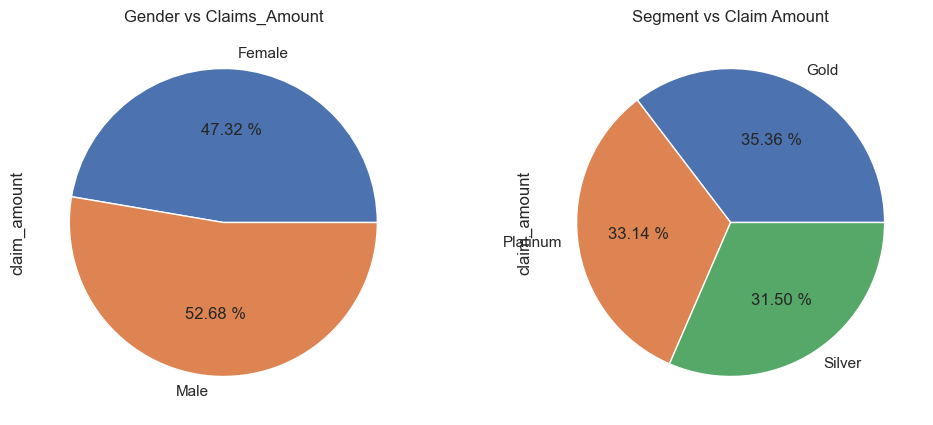

In [57]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
cust_claims[['gender','claim_amount']].groupby('gender').claim_amount.sum().plot(kind='pie', autopct='%1.2f %%')
plt.title('Gender vs Claims_Amount')

plt.subplot(1, 2, 2)
cust_claims[['Segment','claim_amount']].groupby('Segment').claim_amount.sum().plot(kind='pie', autopct='%1.2f %%')
plt.title('Segment vs Claim Amount')

plt.show()

In [ ]:
## Q12. Among males and females, which gender had claimed the most for any type of driver related issues? 
## E.g. This metric can be compared using a bar chart

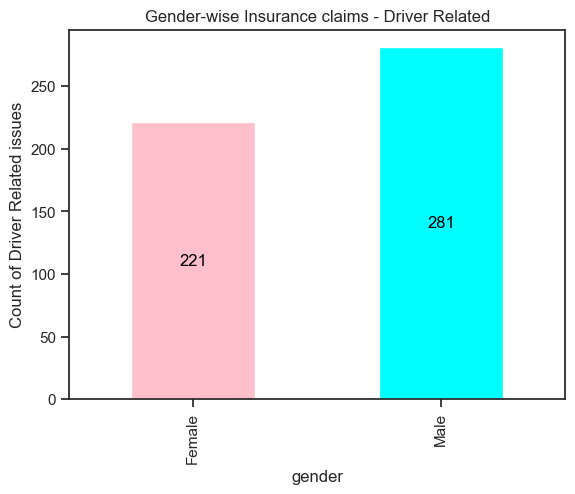

In [108]:
gender_wise = cust_claims.loc[cust_claims.incident_cause.str.contains("river"),:].groupby('gender').gender.count()
#plt.ticklabel_format(style='plain')
abc = gender_wise.plot(kind='bar', color=['pink','aqua'], ylabel = 'Count of Driver Related issues')
plt.title('Gender-wise Insurance claims - Driver Related')
abc.bar_label(container = abc.containers[0], label_type='center', color='black')
plt.show()

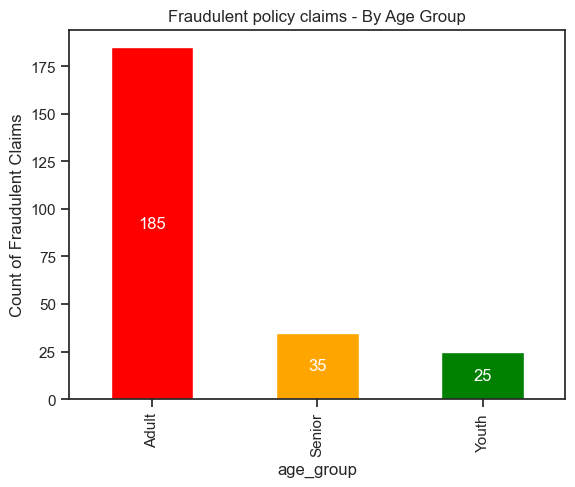

In [113]:
## Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
fraud_df = cust_claims.loc[(cust_claims.fraudulent == 'Yes'),:].groupby('age_group').customer_id.count()
plt.title('Fraudulent policy claims - By Age Group')
f_bar = fraud_df.plot(kind = 'bar', color = ['red','orange','green'], ylabel = 'Count of Fraudulent Claims')
f_bar.bar_label(container = f_bar.containers[0], label_type='center', color='white')
plt.show()

In [ ]:
## Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
## Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [114]:
cust_claims.head(2)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,report_flag,age,age_group
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0,57,Adult
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0,48,Adult


In [115]:
cust_claims.claim_date.dt.year.unique()

array([2018, 2017])

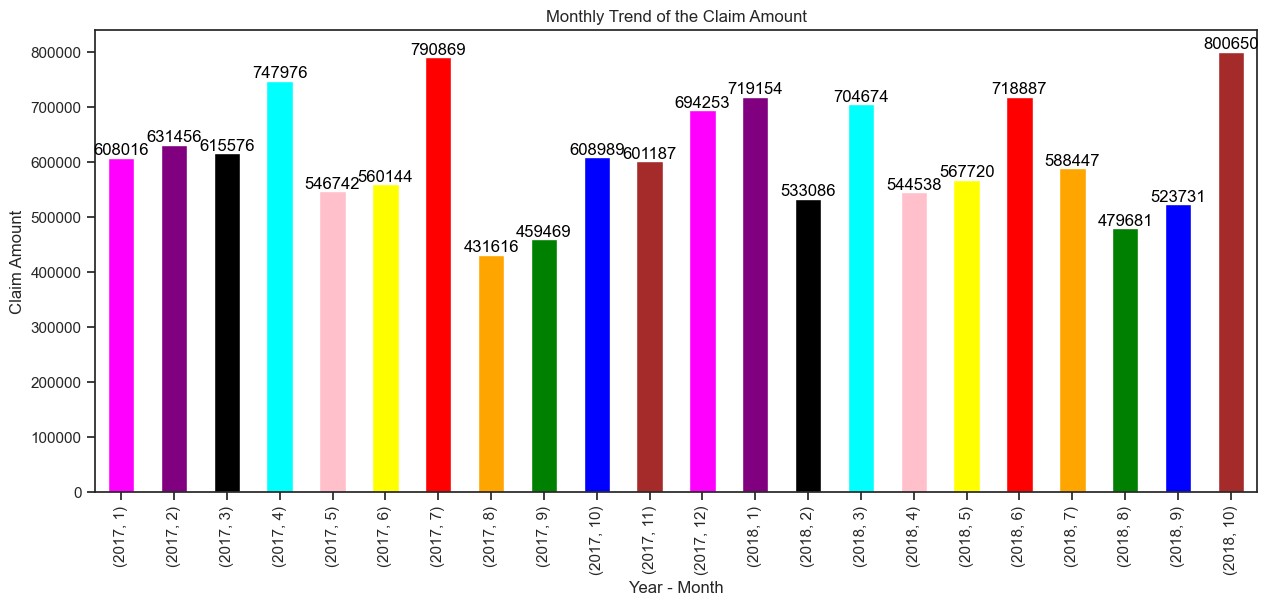

In [148]:
monthly_claim = cust_claims.groupby([cust_claims.claim_date.dt.year, cust_claims.claim_date.dt.month]).claim_amount.sum()
month_bar = monthly_claim.plot(kind='bar', figsize=(15,6), ylabel='Claim Amount', xlabel='Year - Month', color=['magenta','purple','black','aqua','pink','yellow','red','orange','green','blue','brown','magenta','purple','black','aqua','pink','yellow','red','orange','green','blue','brown'])
month_bar.bar_label(container = month_bar.containers[0], label_type='edge', color='black')
plt.title('Monthly Trend of the Claim Amount')
plt.show()

In [ ]:
## Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that 
## represents fraudulent claims and the other for non-fraudulent claims.

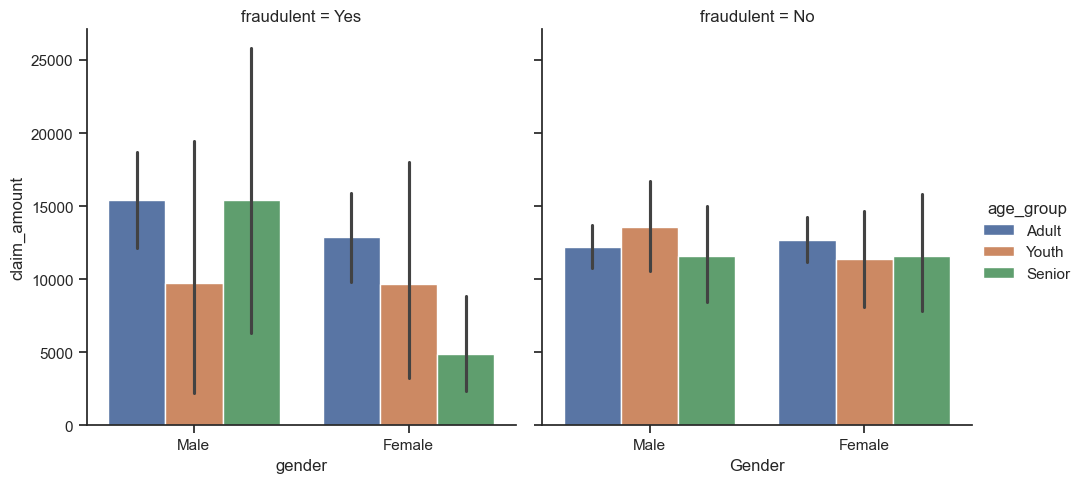

In [159]:
sns.catplot(data=cust_claims, x="gender", y="claim_amount", hue="age_group", col="fraudulent", kind="bar")
plt.ylabel('Claim Amount')
plt.xlabel('Gender')
plt.show()

## HYPOTHESIS TESTING

In [ ]:
Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of 
the statements.

In [ ]:
## Q16. Is there any similarity in the amount claimed by males and females?

H0 ==> There is similarity in the amount claimed by males and females (pvalue > pcritical)
Ha ==> There is no similarity in the amount claimed by males and females (pvalue < pcritical)

In [172]:
cust_claims.gender.value_counts()

gender
Male      551
Female    527
Name: count, dtype: int64

In [ ]:
## Data values are continuous - claim amount(mean) by gender
## Parameters - Gender, claim_amount
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As there are two numerical columns involved, we will go for t-test, independent sample
## We will test our hypothesis at 5% significance level 

In [186]:
## Data collection
male_cl = cust_claims[cust_claims.gender == 'Male'].claim_amount
female_cl = cust_claims[cust_claims.gender == 'Female'].claim_amount

In [187]:
pv = stats.ttest_ind(male_cl, female_cl)

In [188]:
pv.pvalue

0.33601006135365463

#### t-test pvalue(0.336) is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is greater than 0.05 we can safely conclude with 95% confidence that there is a similarity in amount claimed by males and females. There is similarity in the amount claimed by males and females

In [189]:
## Q17. Is there any relationship between age category and segment?

In [ ]:
H0 ==> There is relationship between age category and segment (pvalue > pcritical)
Ha ==> There is no relationship between age category and segment (pvalue < pcritical)

In [ ]:
## Data values are both categorical in nature - categorical(age_group) and categorical(Segment)
## Parameters - Age_group, Segment
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - Relationship between two categorical columns, we will go for chi-square testing
## We will test our hypothesis at 5% significance level 

In [217]:
## DATA COLLECTION
age_seg = pd.crosstab(cust_claims.Segment, cust_claims.age_group)

In [218]:
age_seg

age_group,Adult,Senior,Youth
Segment,,,
Gold,278,45,48
Platinum,270,47,44
Silver,257,40,49


In [219]:
pv17 = stats.chi2_contingency(age_seg)

In [222]:
pv17.pvalue.round(4)

0.9303

#### chi Square pvalue(0.9303) is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0) - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of chi_square test is greater than 0.05 we can safely conclude with 95% confidence that 
#### There is relationship between age category and segment

In [ ]:
## Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
H0 ==> The average claim amount for 2018 is greater >= 10000 (pvalue > pcritical)
Ha ==> The average claim amount for 2018 is <> 10000 (pvalue < pcritical)

In [223]:
cust_claims.claim_date.dt.year.unique()

array([2018, 2017])

In [ ]:
## Data valueis numerical in nature - claim_amount(average)
## Parameters - year, claim amount
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - ttest; so we can do t test 1 sample
## We will test our hypothesis at 5% significance level 

In [224]:
## DATA COLLECTION
cust_claims.claim_amount[cust_claims.claim_date.dt.year == 2018].mean()

12743.437531675843

In [227]:
pv18 = stats.ttest_1samp(cust_claims.claim_amount[cust_claims.claim_date.dt.year == 2018], 10000)

In [228]:
pv18.pvalue

9.43584422198333e-06

#### ttest 1sample pvalue(9.435) is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0) - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of ttest ` sample test is greater than 0.05 we can safely conclude with 95% confidence that 
#### Current year has shown a significant rise in claim amounts compared to 2016-17 fiscal average $10,000.

In [ ]:
## Q19. Is there any difference between age groups and insurance claims?

In [ ]:
H0 ==> No difference between age groups and insurance claims (pvalue > pcritical)
Ha ==> There is difference between age groups and insurance claims (pvalue < pcritical)

In [229]:
cust_claims.age_group.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [ ]:
## Data values are both categorical and numerical in nature - age_group(categorical), claim_amount(numerical)
## Parameters - age_group, claim amount
## Age group - need to create multiple data samples for each age group
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - Annova(f-test); multiple data samples involved
## We will test our hypothesis at 5% significance level 

In [242]:
## DATA COLLECTION
adult_ = cust_claims[cust_claims.age_group == 'Adult'].claim_amount
youth_ = cust_claims[cust_claims.age_group == 'Youth'].claim_amount
senior_ = cust_claims[cust_claims.age_group == 'Senior'].claim_amount

In [243]:
print( 'Mean(Adult):', round(adult_.mean(),2), '\nMean(Youth):', round(youth_.mean(),2), '\nMean(Senior):', round(senior_.mean(),2))

Mean(Adult): 12858.71 
Mean(Youth): 12021.81 
Mean(Senior): 10837.32


In [245]:
pv19 = stats.f_oneway(adult_, youth_, senior_)

In [246]:
pv19.pvalue

0.24626263091160944

#### Annova, f-test multiple sample pvalue(0.2462) is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0) - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of f-test for multiple sample test is greater than 0.05 we can safely conclude with 95% confidence that 
#### We can say there is no difference between age groups and insurance claims.

In [ ]:
## Q20. Is there any relationship between total number of policy claims and the claimed amount?

In [247]:
cust_claims.total_policy_claims.unique()

array([1.        , 2.        , 3.        , 4.        , 6.        ,
       5.        , 1.58895131, 8.        , 7.        ])

In [ ]:
## Data values are both numerical in nature - total_policy_claims(numerical), claim_amount(numerical)
## Parameters - total_policy_claims, claim amount
## Hypothesis testing - Pearson Correlation test; two quantitative data samples involved

In [254]:
## Data Collection
cust_claims.total_policy_claims.corr(cust_claims.claim_amount, method='pearson')

-0.02190948742030374

#### Pearson Correlation test - relationship between two quantitative data
#### BUSINESS CONCLUSION: # As the value of Pearson Correlation test is NEGATIVE 
#### We can conclude that total number of policy claims is inversely proportional to the claimed amount

## --The End - Insurance Claims CS --